Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
train = pd.read_csv('/train.csv')

In [3]:
train

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

visualizing the distribution of revenue

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of log revenue')

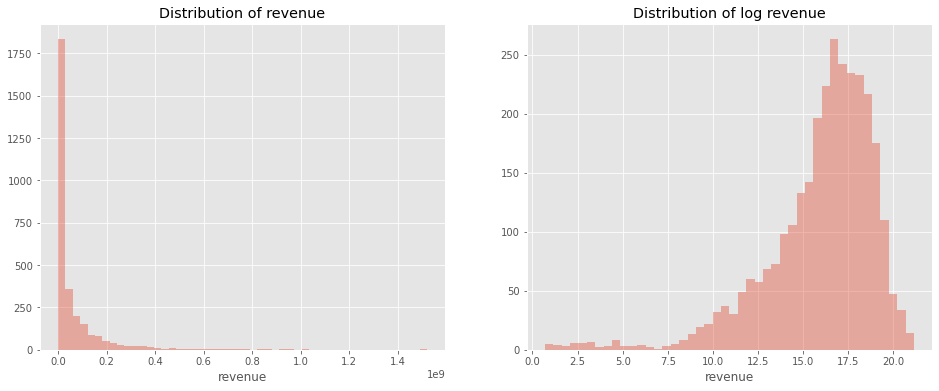

In [4]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.distplot(train['revenue'], kde=False);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(train['revenue']), kde=False);
plt.title('Distribution of log revenue')

In [5]:
train['log_revenue'] = np.log1p(train['revenue'])
train['log_budget'] = np.log1p(train['budget'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



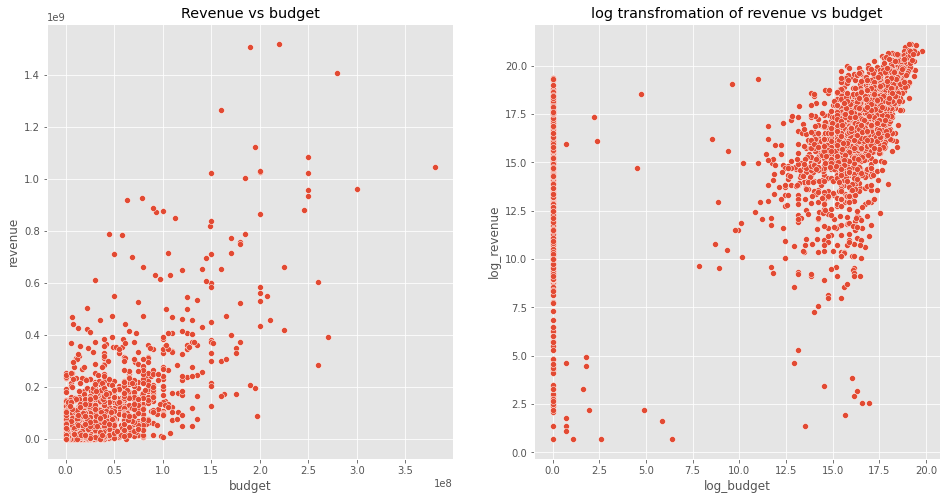

In [6]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
sns.scatterplot(train['log_budget'], train['log_revenue']) 
plt.title('log transfromation of revenue vs budget');

In [7]:
train['homepage'].value_counts()

http://www.transformersmovie.com/                               4
http://www.lordoftherings.net/                                  2
http://www.thehobbit.com/                                       2
http://www.theasylum.cc/product.php?id=203                      1
http://www.getoutfilm.com/                                      1
                                                               ..
http://www.thelasthouseontheleft.com/                           1
http://www.bfi.org.uk/whats-on/bfi-film-releases/howards-end    1
http://www.deadsnow.com/                                        1
http://cropseylegend.com/                                       1
http://tracks-movie.com/                                        1
Name: homepage, Length: 941, dtype: int64

In [8]:
train['has_homepage'] = 0

In [9]:
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1

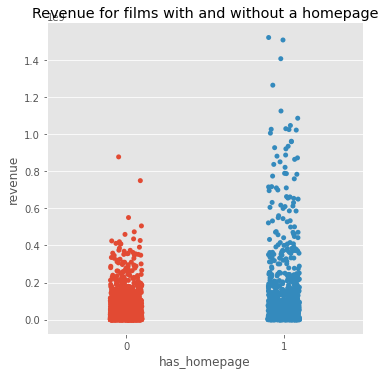

In [10]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for films with and without a homepage');

In [11]:
language_data = train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

Text(0.5, 1.0, 'mean of log revenue per language')

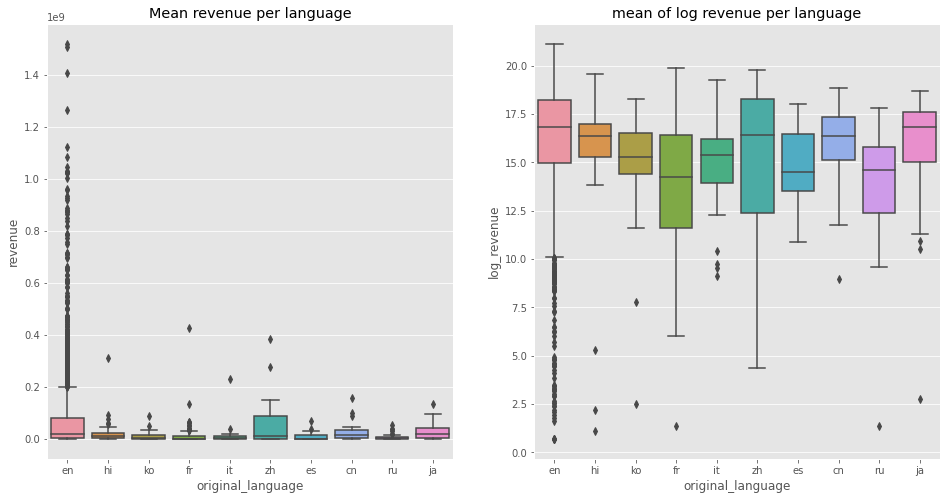

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y = 'revenue', data=language_data )
plt.title('Mean revenue per language')
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y = 'log_revenue', data=language_data)
plt.title('mean of log revenue per language')

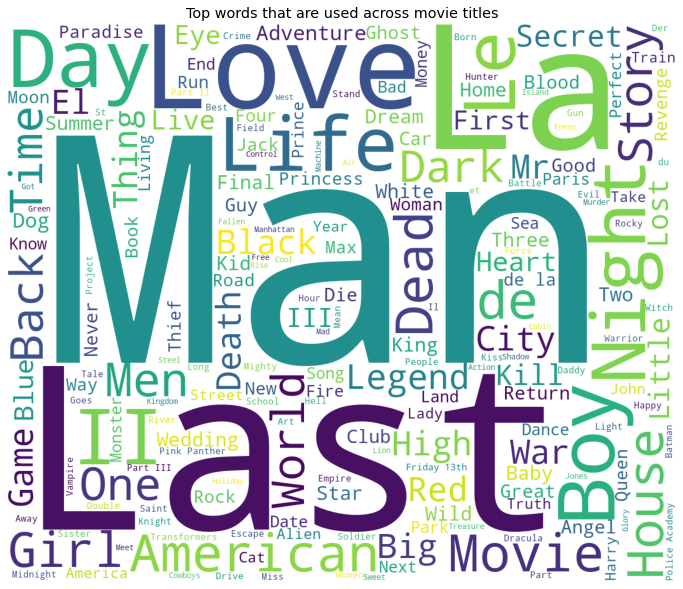

In [13]:
plt.figure(figsize=(12, 12))
text =  ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1200, height =1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words that are used across movie titles')
plt.axis('off')
plt.show()

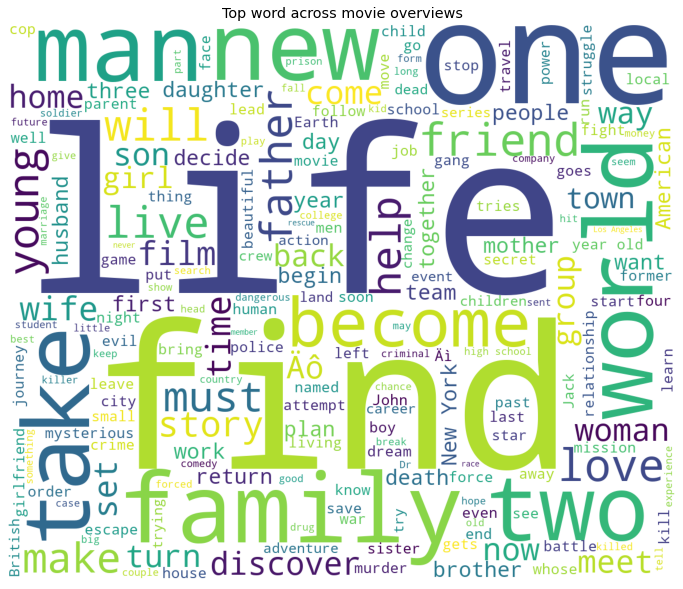

In [14]:
plt.figure(figsize=(12, 12))
text =  ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1200, height =1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top word across movie overviews')
plt.axis('off')
plt.show()